In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# day_head_circumference_tensor = torch.tensor(pd.read_csv("https://gitlab.com/ntnu-tdat3025/regression/childgrowth-datasets/raw/master/day_head_circumference.csv").values, dtype=torch.float)
day_head_circumference_tensor = torch.tensor(pd.read_csv("./day_head_circumference.csv").values, dtype=torch.float)
x_train = day_head_circumference_tensor[:, 0].reshape(-1, 1)
y_train = day_head_circumference_tensor[:, 1].reshape(-1, 1)

x_max = torch.max(x_train).item()

1856.0


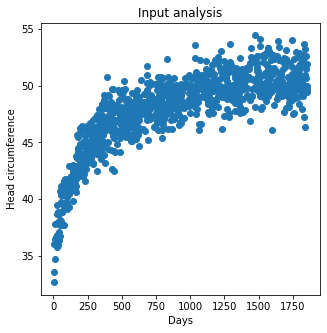

In [3]:
plt.figure(figsize=((5,5)))
plt.scatter(x_train, y_train)
plt.title('Input analysis')
plt.xlabel('Days')
plt.ylabel('Head circumference')
plt.show()

In [4]:
class NonLinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)
        self.b = torch.tensor([[0.0]], requires_grad=True)
	
    def sigmoid_fn(self, z):
	    return (1/(1+torch.exp(-z)))

    # Predictor
    def f(self, x):
        return 20*torch.sigmoid(x @ self.W + self.b)+31
    
    def loss(self, x, y):
        return torch.nn.functional.mse_loss(self.f(x)/x_max, y)

In [5]:
model = NonLinearRegressionModel()
optimizer = torch.optim.SGD([model.W, model.b], lr=0.22)

x_train = x_train / x_max
y_train = y_train / x_max

# print(model.f(x_train))


In [6]:
for epoch in range(1000):
	# print(f'W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}')
	model.loss(x_train, y_train).backward()

	optimizer.step()
	optimizer.zero_grad()

In [7]:
print(f'W = {model.W}, b = {model.b}, loss = {model.loss(x_train, y_train)}')
print(model.W)

W = tensor([[0.0026]], requires_grad=True), b = tensor([[0.0044]], requires_grad=True), loss = 1.687765325186774e-05
tensor([[0.0026]], requires_grad=True)


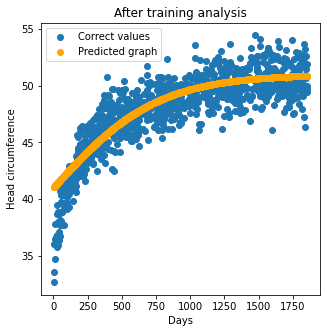

In [8]:
x_train = x_train * x_max
y_train = y_train * x_max
plt.figure(figsize=((5,5)))
plt.title('After training analysis')
plt.xlabel('Days')
plt.ylabel('Head circumference')
plt.scatter(x_train, y_train, label='Correct values')
plt.scatter(x_train, model.f(x_train).detach(), c='orange', label='Predicted graph')
plt.legend()